# 과제 : Clustering 해보기 (Mall_Customers.csv)  
1) Preprocessing / EDA  
2) Clustering   
3) Evaluation  

## Data Describe
CustomerID : Unique ID assigned to the customer  
Gender : Gender of the customer  
Age : Age of the customer  
Annual Income(k$) : Annual Income of the customer  
Spending Score(1-100) : Score assigned by the mall based on customer behavior and spending nature

# 데이터 탐색

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
len(df['CustomerID'].unique())==len(df['CustomerID']) # 트랜잭션 아니므로 CustomerID 삭제
df.drop(['CustomerID'],axis=1,inplace=True)

In [ ]:
# 인코딩
df.replace('Male',0,inplace=True)
df.replace('Female',1,inplace=True)

In [39]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [35]:
df.isnull().sum() # 결측치 X

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [58]:
df.corr() 
# 나이와 Spending Score간 음의 상관관계 이를 제외하곤 눈에 띄는 상관관계가 보이지 않는다
# 따라서 Feature 추가 

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.058109,-0.327227,0.009903,1.000000


In [65]:
df['Flexing']=df.iloc[:,3]/df.iloc[:,2] # 연봉 대비 Spending Score가 높은 정도 Feature

In [67]:
df['Flexing'].describe() # 75%가 약 1.13 -> 1.1 이상인 친구들 Flexer로 지정

count    200.000000
mean       1.068544
std        0.973406
min        0.012821
25%        0.632803
50%        0.887993
75%        1.130245
max        5.400000
Name: Flexing, dtype: float64

In [83]:
df['Flexer']=0
(df['Flexer'][df['Flexing']>=1.1])=1

C:\Users\kcg99\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [84]:
len(df[df['Flexer']==1])

57

# 클러스터링 

In [87]:
data=df.drop(['Flexer'],axis=1)

In [101]:
labels=df[['Flexer']]
labels.columns=['labels']

In [128]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

## Hierarchical 

### 단순 거리 ( complete )

C:\Users\kcg99\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\kcg99\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


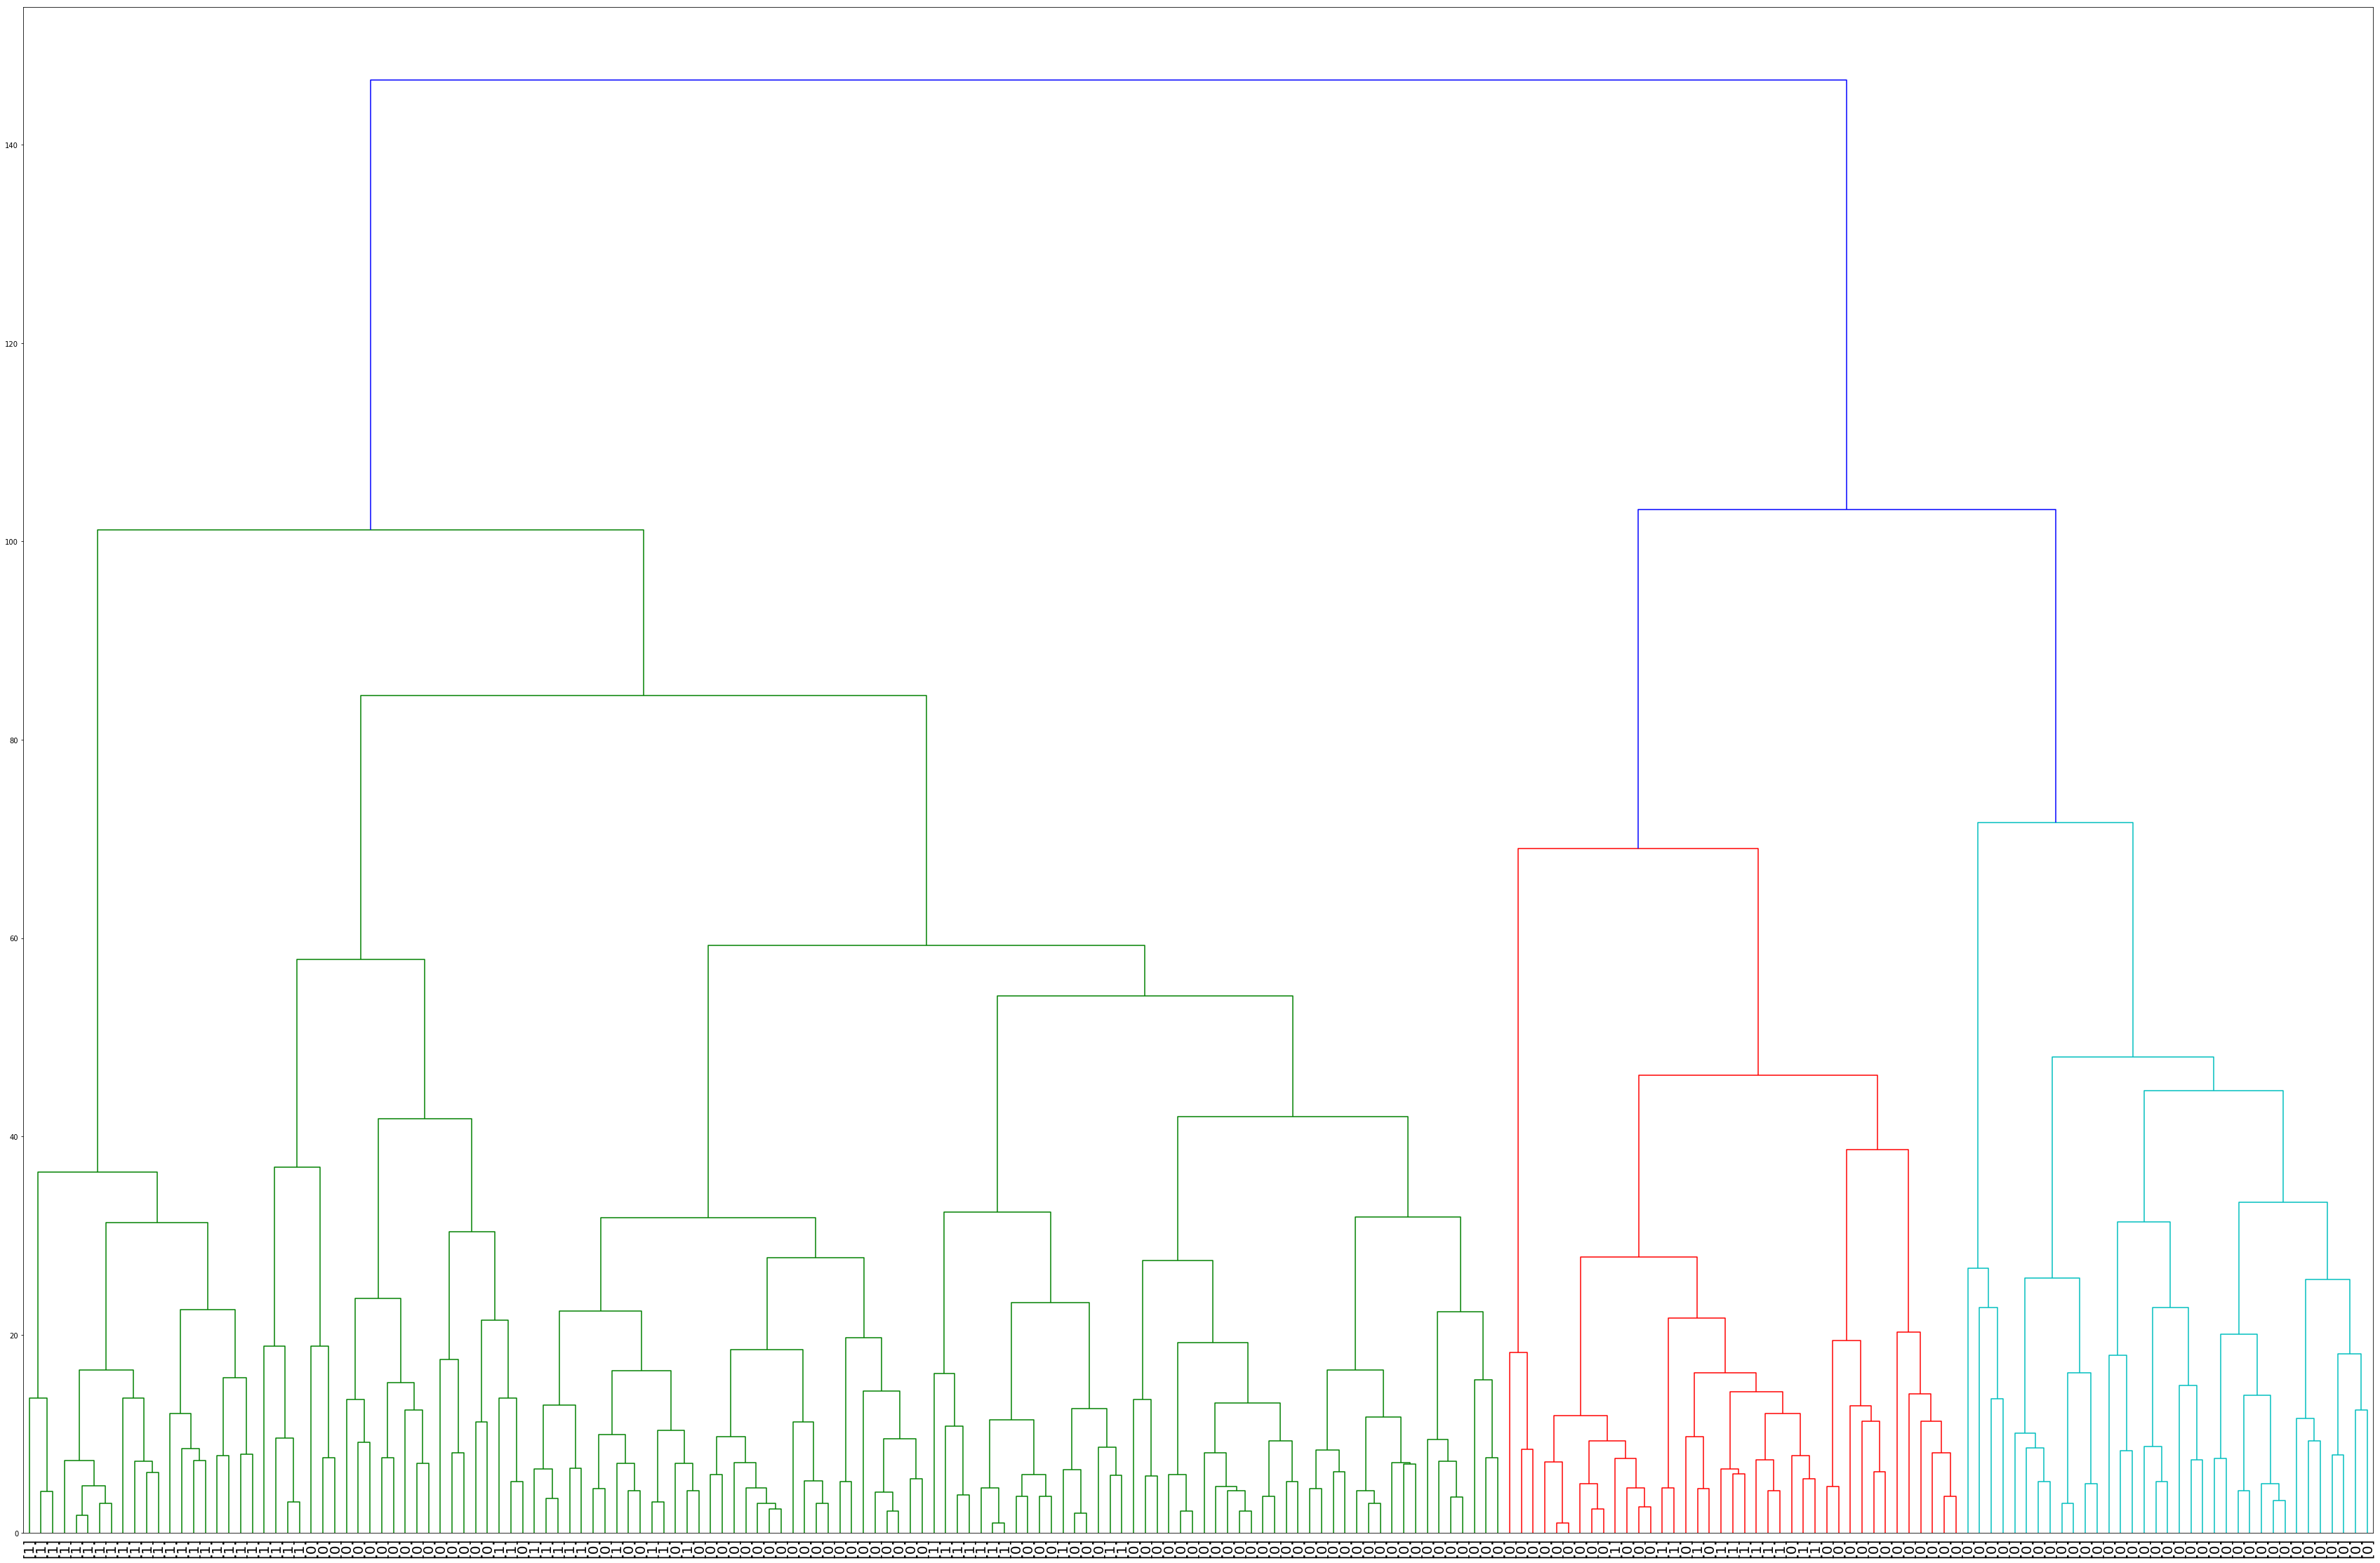

In [125]:
links = linkage(data,method='complete')

# Plot the dendrogram
plt.figure(figsize=(60,40))
dendrogram(links,
           labels = labels.as_matrix(columns=['labels']),
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()

In [127]:
# 교차 분석 결과  
from scipy.cluster.hierarchy import fcluster

predict = pd.DataFrame(fcluster(links,140,criterion='distance'))
#print(predict)
predict.columns=['predict']
ct = pd.crosstab(predict['predict'],labels['labels'])
print(ct)
# 생각보다 잘 라벨링 

labels    0   1
predict        
1        81  45
2        62  12


In [143]:
ct.iloc[1,0]+ct.iloc[1,1]-200/200

73.0

###  ward - method (최소 분산 알고리즘)

C:\Users\kcg99\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


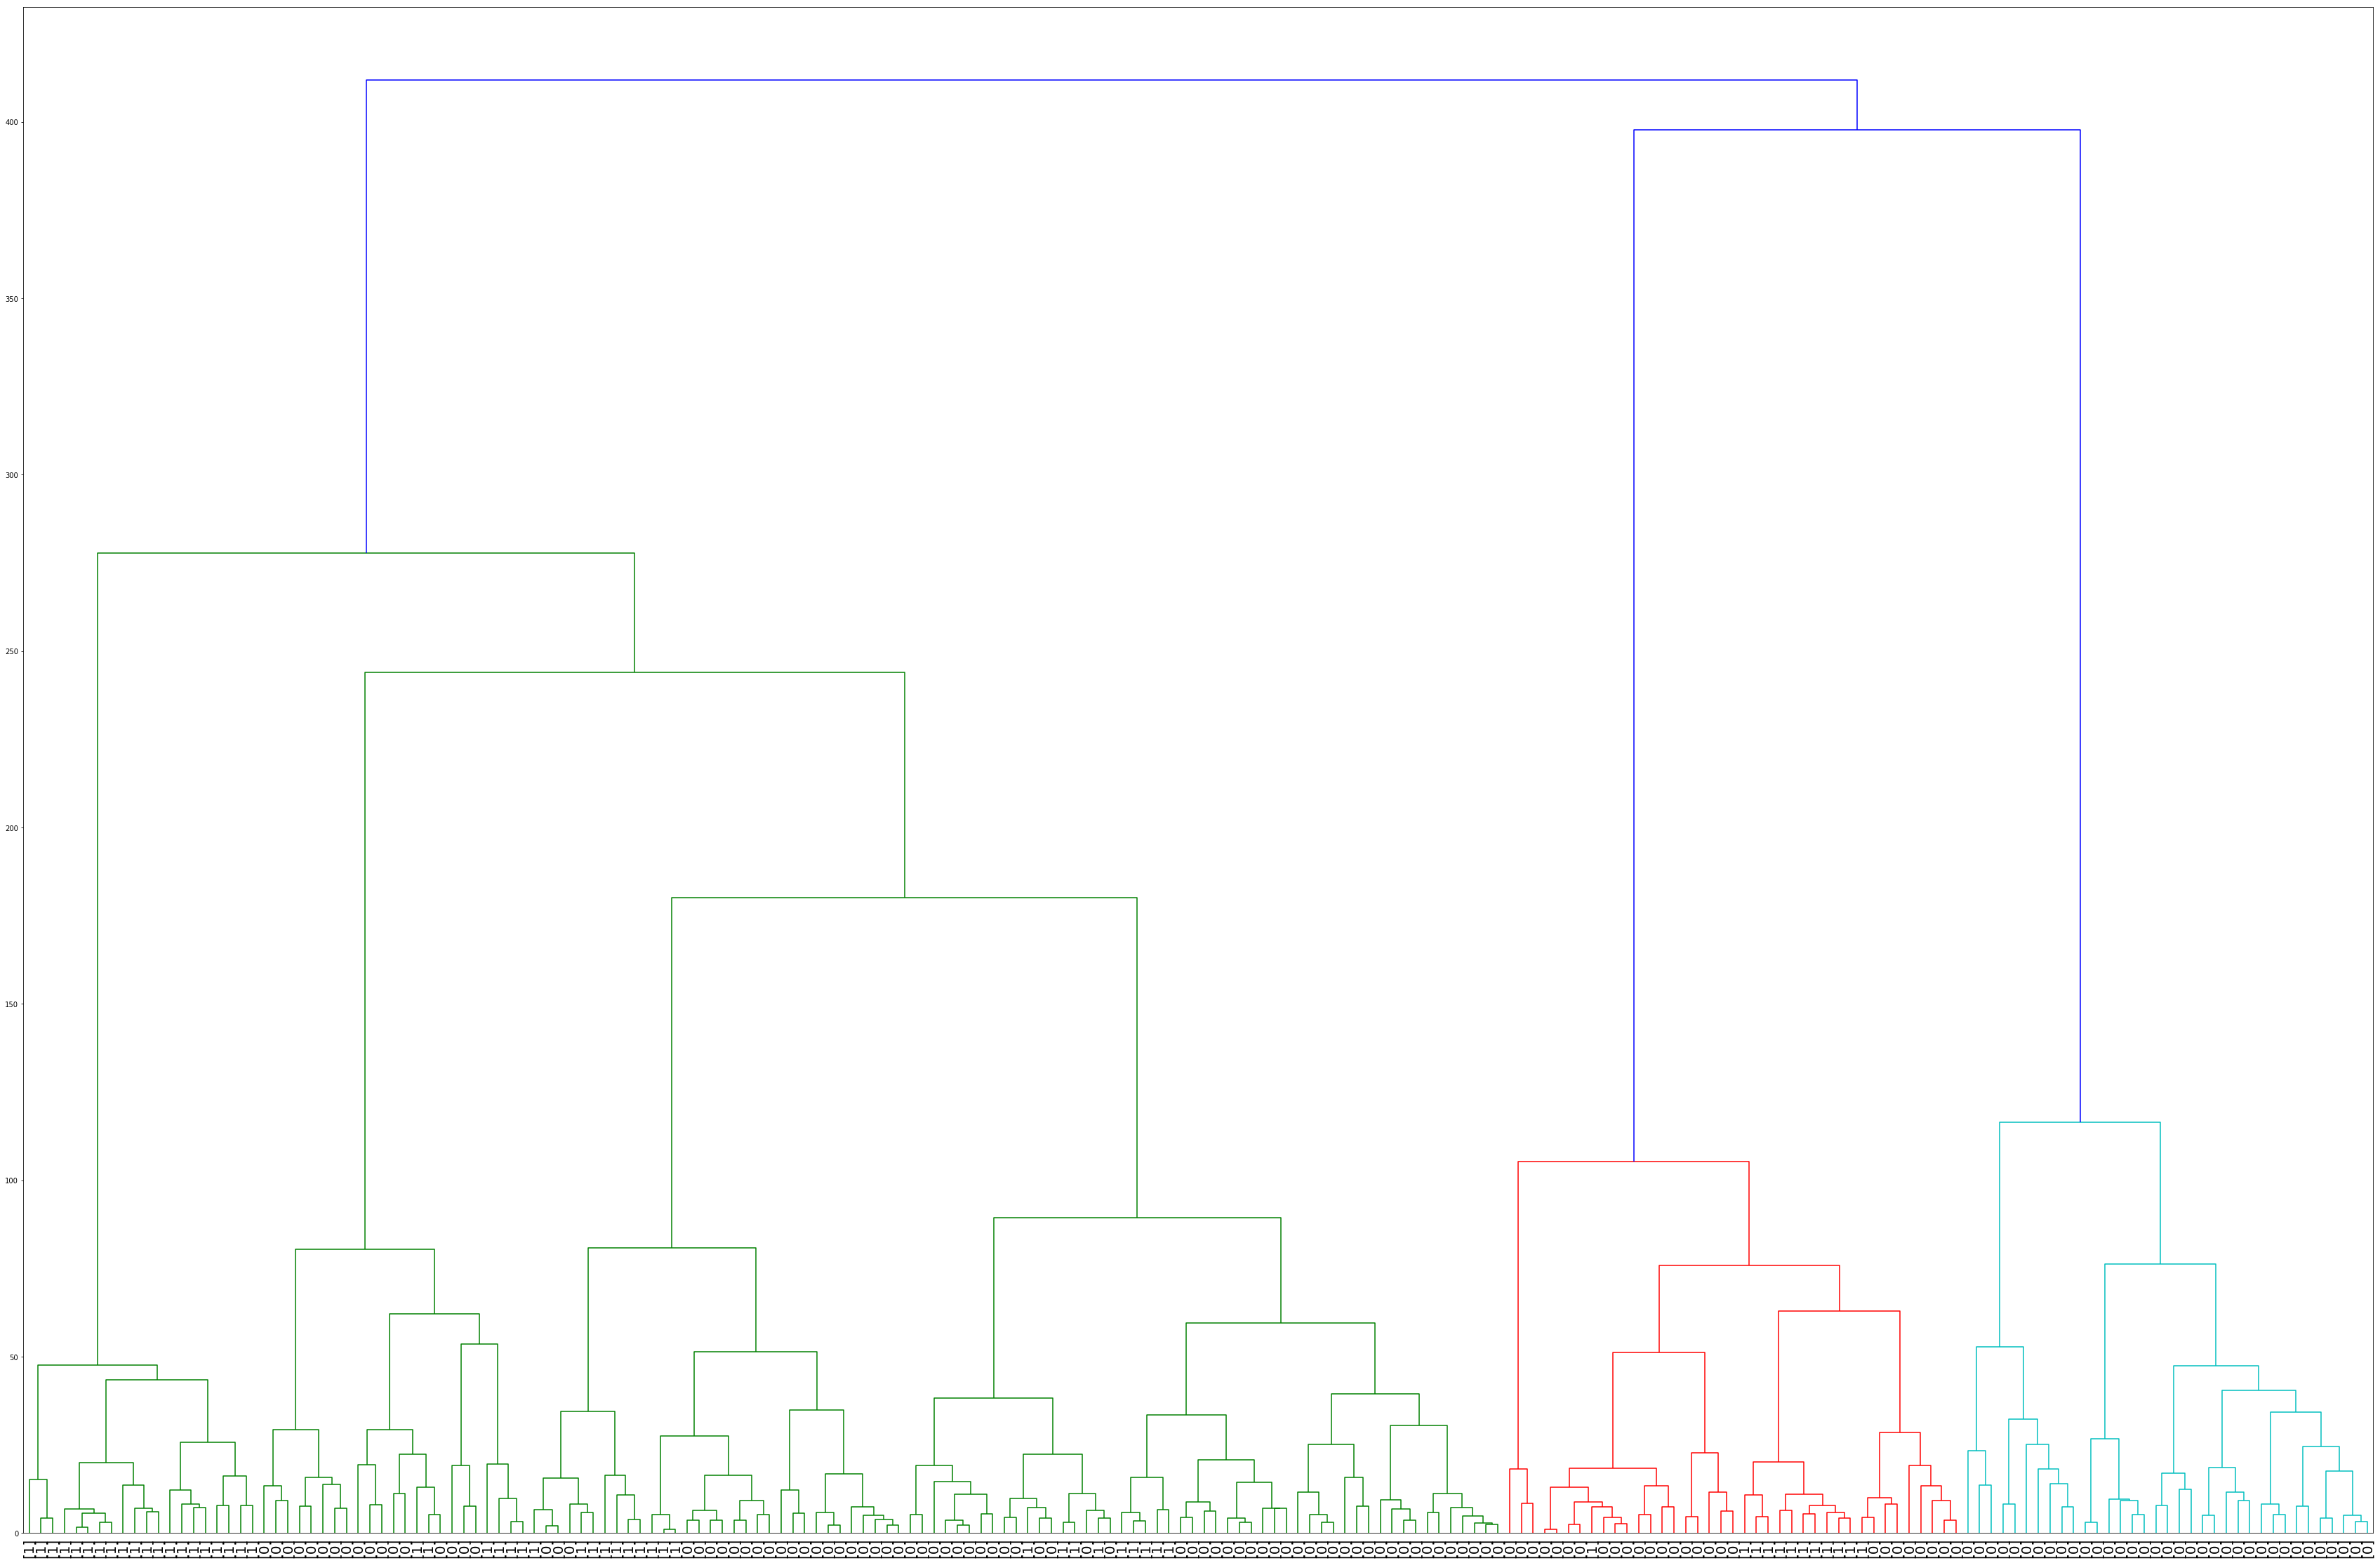

In [144]:

links = linkage(data,method='ward')

# Plot the dendrogram
plt.figure(figsize=(60,40))
dendrogram(links,
           labels = labels.as_matrix(columns=['labels']),
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()

In [147]:
# 교차 분석 결과  
from scipy.cluster.hierarchy import fcluster

predict = pd.DataFrame(fcluster(links,360,criterion='distance'))
#print(predict)
predict.columns=['predict']
ct = pd.crosstab(predict['predict'],labels['labels'])
print(ct)
# 3번이 Non-Flexer중 특수 집단인듯 

labels    0   1
predict        
1        81  45
2        27  12
3        35   0


In [181]:
display(df[predict['predict']==3].head())
print('이 군집 평균 연령대 :',(df[predict['predict']==3]['Age']).mean())
print('원 데이터 평균 연령대 :',(df['Age']).mean())
print('이 군집 평균 수입 :',(df[predict['predict']==3]['Annual Income (k$)']).mean())
print('원 데이터 평균 수입 :',(df['Annual Income (k$)']).mean())
#연봉이 굉장히 높은편인데 Spending Score는 매우 낮은걸 볼 수 있음
#연령대도 높고, 고연봉자인데 돈을 안쓰는 사람으로 묶인듯

,Gender,Age,Annual Income (k$),Spending Score (1-100),Flexing,Flexer
126,0,43,71,35,0.492958,0
128,0,59,71,11,0.154930,0
130,0,47,71,9,0.126761,0
134,0,20,73,5,0.068493,0
136,1,44,73,7,0.095890,0


이 군집 평균 연령대 : 41.68571428571428
원 데이터 평균 연령대 : 38.85
이 군집 평균 수입 : 88.22857142857143
원 데이터 평균 수입 : 60.56


## K-means

In [255]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
data_scaled=ss.fit_transform(data)

C:\Users\kcg99\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kcg99\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### 평가1. Elbow Point

Text(0.5, 1.0, 'Elbow curve')

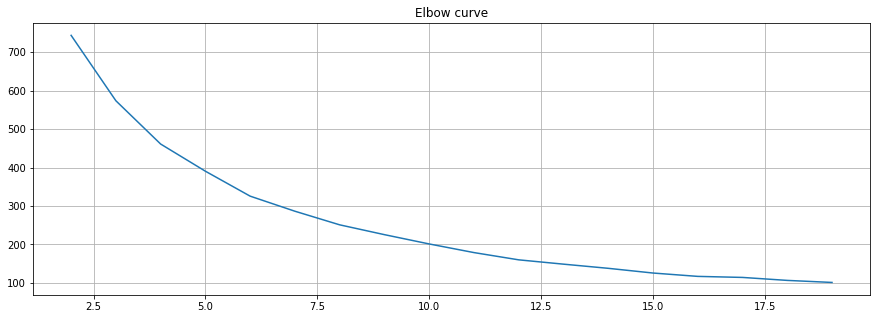

In [264]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

X = data_scaled
distorsions = []
for k in range(2, 20):
    kmeans =KMeans(n_clusters=k,init='k-means++',algorithm='auto')
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')
# 적당히 7쯤에서 끊자

In [267]:
# K-Means++ 이용
# 시각화 위해 표준화 X
model = KMeans(n_clusters=7,init='k-means++',algorithm='auto')
model.fit(data)
predict = pd.DataFrame(model.predict(data))
predict.columns=['predict']

r = pd.concat([df,predict],axis=1)
display(r)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Flexing,Flexer,predict
0,0,19,15,39,2.600000,1,4
1,0,21,15,81,5.400000,1,3
2,1,20,16,6,0.375000,0,4
3,1,23,16,77,4.812500,1,3
4,1,31,17,40,2.352941,1,4
5,1,22,17,76,4.470588,1,3
6,1,35,18,6,0.333333,0,4
7,1,23,18,94,5.222222,1,3
8,0,64,19,3,0.157895,0,4
9,1,30,19,72,3.789474,1,3


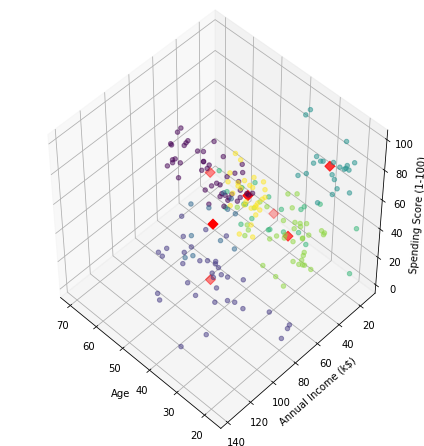

In [268]:
# 각 군집의 중심점 
centers = pd.DataFrame(model.cluster_centers_,columns=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Flexing'])
center_x = centers['Age']
center_y = centers['Annual Income (k$)']
center_z = centers['Spending Score (1-100)']

from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Age'],r['Annual Income (k$)'],r['Spending Score (1-100)'],c=r['predict'],alpha=0.5)
ax.scatter(center_x,center_y,center_z,s=50,marker='D',c='r')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

### 평가2 Silhouette

In [310]:
import numpy as np
from sklearn.metrics import silhouette_samples
from matplotlib import cm

def plotSilhouette(X,y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')
    y_ax_lower,y_ax_upper =0,0
    yticks=[]
    
    for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)
        
        plt.barh(range(y_ax_lower,y_ax_upper), c_silhouette_vals, height =1.0,
                edgecolor='none',color =color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
        
    silhoutte_avg=np.mean(silhouette_vals)
    plt.axvline(silhoutte_avg, color='red', linestyle='--')
    plt.yticks(yticks,cluster_labels+1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette')
    plt.show()

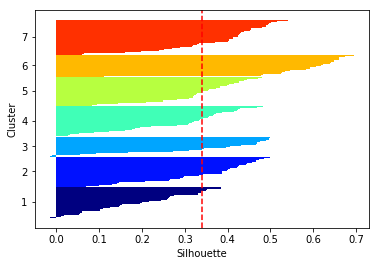

In [318]:
KM = KMeans(n_clusters=7)
y_km = KM.fit_predict(X)
plotSilhouette(X,y_km)
#K = 7 의 실루엣

## DBSCAN

In [319]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

In [368]:
model = DBSCAN(eps=2,min_samples=3)
# 거리 2, 갯수 10
predict = pd.DataFrame(model.fit_predict(data_scaled))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([data,predict],axis=1)

display(r)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Flexing,predict
0,0,19,15,39,2.600000,0
1,0,21,15,81,5.400000,0
2,1,20,16,6,0.375000,1
3,1,23,16,77,4.812500,1
4,1,31,17,40,2.352941,1
5,1,22,17,76,4.470588,1
6,1,35,18,6,0.333333,1
7,1,23,18,94,5.222222,1
8,0,64,19,3,0.157895,0
9,1,30,19,72,3.789474,1


In [369]:
r['predict'].unique()

array([0, 1], dtype=int64)

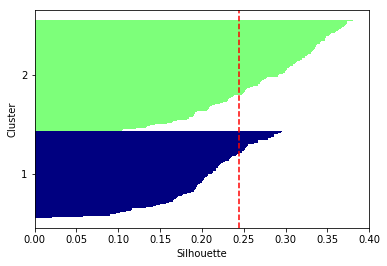

In [370]:
plotSilhouette(data_scaled,model.fit_predict(data_scaled))
# EPS 2 , MIN_SAMPLES=3의 실루엣